In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import os
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv

In [28]:
load_dotenv()

True

In [29]:
save_path = os.environ.get("SAVE_PATH")
BASE_LOAD_PATH = Path.home() / save_path
slate_st = pd.read_csv(BASE_LOAD_PATH / "serving_time_wp_slate.csv")
wp_st = pd.read_csv(BASE_LOAD_PATH / "serving_time_wp.csv")
sq_st = pd.read_csv(BASE_LOAD_PATH / "serving_time_slateq.csv")

In [30]:
res_df = pd.concat([wp_st, sq_st, slate_st])

In [31]:
import re

# define the pattern to match the string
pattern = r'^WA-SlateQ-(\d+)$'
pattern1= r'^WA-Item-(\d+)$'

# define a function to replace the string
def replace_string(string):
    # check if the string matches the pattern
    match = re.match(pattern, string)
    match1= re.match(pattern1, string)
    if match:
        # extract the number from the pattern and add a percentage symbol
        num = match.group(1)
        new_string = 'Proto-Slate ' + num + '%'
        return new_string
    elif match1:
        num = match1.group(1)
        new_string = 'Proto-Item ' + num + '%'
        return new_string
    else:
        # if the string does not match the pattern, return the original string
        return string

In [32]:
res_df["model_name"] = res_df["model_name"].apply(replace_string)


In [33]:
res_df = res_df.reset_index(drop=True).sort_index(ascending=False)

In [34]:
res_df

,model_name,num_candidates,serving_time
27,Proto-Slate 20%,300,0.017098
26,Proto-Slate 20%,500,0.017078
25,Proto-Slate 20%,1000,0.017349
24,Proto-Slate 20%,2000,0.015290
23,Proto-Slate 10%,300,0.009341
22,Proto-Slate 10%,500,0.008636
21,Proto-Slate 10%,1000,0.009470
20,Proto-Slate 10%,2000,0.009070
19,Proto-Slate 5%,300,0.005748
18,Proto-Slate 5%,500,0.005953


In [35]:
from setup_plot import setup_plot
setup_plot(font_size=8, w_pts=506*0.6, fig_ratio=0.5)

In [36]:
sns.set_style("whitegrid", {"grid.linestyle": "--", "axes.edgecolor": "black"})

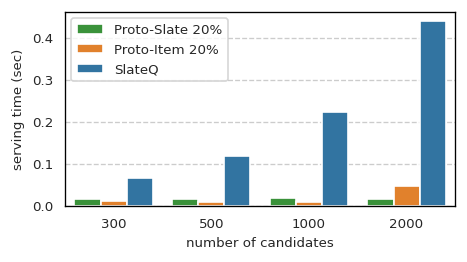

In [37]:
sns.barplot(data=res_df, x="num_candidates", y="serving_time", hue="model_name", hue_order=["Proto-Slate 20%", "Proto-Item 20%", "SlateQ"], palette=["#2ca02c", "#ff7f0e", "#1f77b4"])
plt.ylabel("serving time (sec)")
plt.xlabel("number of candidates")
plt.legend(title="")
plt.savefig("./serving_time.pdf", dpi=300, bbox_inches='tight')


In [38]:
res_df[(res_df["num_candidates"] == 2000) & (res_df["model_name"] == "Slate-Wolpertinger 20%")]

,model_name,num_candidates,serving_time


In [39]:
res_df[(res_df["num_candidates"] == 2000) & (res_df["model_name"] == "SlateQ")]

,model_name,num_candidates,serving_time
15,SlateQ,2000,0.441022


In [40]:
0.380318/0.093549

4.065441640209944